## Case 1: Default case


Iteration 4: x1 = 6, x2 = 11
Iteration 9: x1 = 7.0, x2 = 9.5
Iteration 14: x1 = 7.5, x2 = 8.75
Iteration 19: x1 = 7.75, x2 = 8.375
Iteration 24: x1 = 7.875, x2 = 8.1875
Iteration 29: x1 = 7.9375, x2 = 8.0938
Iteration 34: x1 = 7.9688, x2 = 8.0469
Iteration 39: x1 = 7.9844, x2 = 8.0234
Iteration 44: x1 = 7.9922, x2 = 8.0117
Iteration 49: x1 = 7.9961, x2 = 8.0059
Iteration 54: x1 = 7.998, x2 = 8.0029
Iteration 59: x1 = 7.999, x2 = 8.0015
Iteration 64: x1 = 7.9995, x2 = 8.0007
Iteration 69: x1 = 7.9998, x2 = 8.0004
Iteration 74: x1 = 7.9999, x2 = 8.0002
Iteration 79: x1 = 7.9999, x2 = 8.0001
Iteration 84: x1 = 8.0, x2 = 8.0
Iteration 89: x1 = 8.0, x2 = 8.0
Iteration 94: x1 = 8.0, x2 = 8.0
Iteration 99: x1 = 8.0, x2 = 8.0
Total packets transmitted: 888.0
Throughput: 893.0214 bps


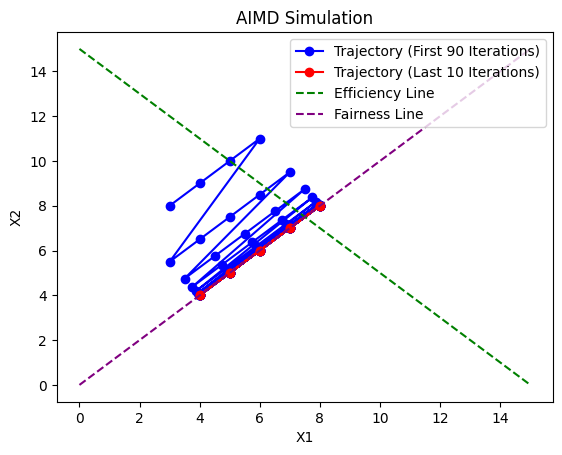

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class AIMD:
    def __init__(self, C, alpha, beta, iterates_max = 100):
        self.C = C # Max capacity = 15
        self.iterates_max = iterates_max # Maximum iterations = 100
        self.alpha = alpha
        self.beta = beta
        self.x1 = np.random.randint(1, 4) # Initialise window size for user 1 (x1) with random value
        self.x2 = np.random.randint(5, 8) # Initialise window size for user 2 (x2) with random value
        self.x1_values = np.zeros(iterates_max) # Storing x1 values to plot graph
        self.x2_values = np.zeros(iterates_max) # Storing x2 values to plot graph
        self.RTT_mean = 80 # Mean RTT = 80

    def run(self):
        packets_transmitted = 0
        total_data_transmitted = 0
        total_time = 0

        for i in range(self.iterates_max):
            if (i+1) % 5 == 0:
                print(f"Iteration {i}: x1 = {round(self.x1, 4)}, x2 = {round(self.x2, 4)}")

            total_time += self.RTT_mean

            # If combined x1 and x2 is less than max capacity, do AI
            if self.x1 + self.x2 <= self.C:
                total_data_transmitted += (self.x1 + self.x2) * 1000
                packets_transmitted += (self.x1 + self.x2)
                self.x1 += self.alpha
                self.x2 += self.alpha

            # Else do MD
            else:
                self.x1 *= self.beta
                self.x2 *= self.beta

            self.x1_values[i] = self.x1 # Update array with x1 value from this iteration
            self.x2_values[i] = self.x2 # Update array with x2 value from this iteration
            self.RTT_mean = np.random.normal(loc = 80, scale = 5) # Simlulate variation

        throughput = (total_data_transmitted * 8) / total_time
        print(f"Total packets transmitted: {round(packets_transmitted, 4)}")
        print(f"Throughput: {round(throughput, 4)} bps")
        return self.x1_values, self.x2_values

    def fairness_line(self):
        x_values = np.linspace(0, 15, 10)
        y_values = []
        for x in x_values:
          y = x
          y_values.append(y)
        return x_values, y_values

    def capacity_line(self):
        x_values = np.linspace(0, 15, 10)
        y_values = []
        for x in x_values:
          y = -x + 15
          y_values.append(y)
        return x_values, y_values

    def plot(self):
        plt.title("AIMD Simulation")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.plot(self.x1_values[0:90], self.x2_values[0:90], label='Trajectory (First 90 Iterations)', marker='o', color='blue')
        plt.plot(self.x1_values[-10:], self.x2_values[-10:], label='Trajectory (Last 10 Iterations)', marker='o', color='red')
        # plt.plot([min(self.x1_values), max(self.x1_values)], [min(self.x2_values), max(self.x2_values)], linestyle='--', color='black', label='Convergence Line')
        x_values_fl, y_values_fl = self.fairness_line()
        x_values_cl, y_values_cl = self.capacity_line()
        plt.plot(x_values_cl, y_values_cl, linestyle='--', color='green', label='Efficiency Line')
        plt.plot(x_values_fl, y_values_fl, linestyle='--', color='purple', label='Fairness Line')
        plt.legend()
        plt.show()

# Define parametrs:
C = 15
alpha = 1
beta = 0.5

aimd = AIMD(C, alpha, beta)
x1_values, x2_values = aimd.run()
aimd.plot()

## Case 2: Grid search of optimal alpha and beta parameters with variable alpha

alpha: 1, beta: 0.1, throughput: 763.8985006547578
alpha: 1, beta: 0.2, throughput: 797.3662336238012
alpha: 1, beta: 0.3, throughput: 903.548471290222
alpha: 1, beta: 0.4, throughput: 907.9294019881182
alpha: 1, beta: 0.5, throughput: 1031.6403036668942
alpha: 1, beta: 0.6, throughput: 950.9015805038727
alpha: 1, beta: 0.7, throughput: 1006.9849816072694
alpha: 1, beta: 0.8, throughput: 986.1008221434979
alpha: 2, beta: 0.1, throughput: 599.3912320628885
alpha: 2, beta: 0.2, throughput: 551.8762955676572
alpha: 2, beta: 0.3, throughput: 779.1621748180926
alpha: 2, beta: 0.4, throughput: 806.3475875901731
alpha: 2, beta: 0.5, throughput: 857.0204783618681
alpha: 2, beta: 0.6, throughput: 750.3352849471607
alpha: 2, beta: 0.7, throughput: 715.1833004542765
alpha: 2, beta: 0.8, throughput: 819.5564039208401
alpha: 3, beta: 0.1, throughput: 578.8076158925396
alpha: 3, beta: 0.2, throughput: 422.1319359855672
alpha: 3, beta: 0.3, throughput: 554.9397001524571
alpha: 3, beta: 0.4, throughpu

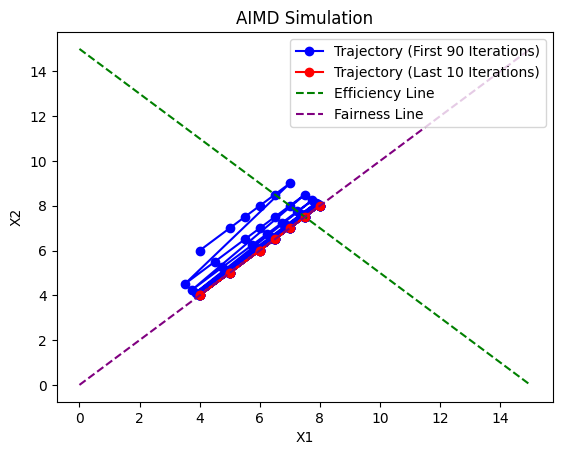

Best hyperparameters: alpha: 1, beta: 0.5
Throughput: 1031.6403
Packets transmitted: 1026.0


In [7]:
import numpy as np
import matplotlib.pyplot as plt

class AIMD:
    def __init__(self, C, alpha, beta, iterates_max = 100):
        self.C = C # Max capacity = 15
        self.iterates_max = iterates_max # Maximum iterations = 100
        self.alpha = alpha
        self.beta = beta
        self.x1 = np.random.randint(1, 4) # Initialise window size for user 1 (x1) with random value
        self.x2 = np.random.randint(5, 8) # Initialise window size for user 2 (x2) with random value
        self.x1_values = np.zeros(iterates_max) # Storing x1 values to plot graph
        self.x2_values = np.zeros(iterates_max) # Storing x2 values to plot graph
        self.RTT_mean = 80 # Mean RTT = 50

    def run(self):
        packets_transmitted = 0
        total_data_transmitted = 0
        total_time = 0

        for i in range(self.iterates_max):
            total_time += self.RTT_mean

            # Check the distance from capacity
            distance_to_capacity = self.C - (self.x1 + self.x2)

            # Adjust alpha based on the distance to capacity (3 packets)
            if distance_to_capacity <= 3:
                alpha_adjusted = self.alpha / 2
            else:
                alpha_adjusted = self.alpha

            # If combined x1 and x2 is less than max capacity, do AI
            if self.x1 + self.x2 <= self.C:
                total_data_transmitted += (self.x1 + self.x2) * 1000
                packets_transmitted += (self.x1 + self.x2)
                self.x1 += alpha_adjusted
                self.x2 += alpha_adjusted

            # Else do MD
            else:
                self.x1 *= self.beta
                self.x2 *= self.beta

            self.x1_values[i] = self.x1
            self.x2_values[i] = self.x2
            self.RTT_mean = np.random.normal(loc = 80, scale = 5)  # Simulate variation

        throughput = (total_data_transmitted * 8) / total_time
        return throughput, packets_transmitted

    def fairness_line(self):
        x_values = np.linspace(0, 15, 10)
        y_values = []
        for x in x_values:
          y = x
          y_values.append(y)
        return x_values, y_values

    def capacity_line(self):
        x_values = np.linspace(0, 15, 10)
        y_values = []
        for x in x_values:
          y = -x + 15
          y_values.append(y)
        return x_values, y_values

    def plot(self):
        plt.title("AIMD Simulation")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.plot(self.x1_values[0:90], self.x2_values[0:90], label='Trajectory (First 90 Iterations)', marker='o', color='blue')
        plt.plot(self.x1_values[-10:], self.x2_values[-10:], label='Trajectory (Last 10 Iterations)', marker='o', color='red')
        # plt.plot([min(self.x1_values), max(self.x1_values)], [min(self.x2_values), max(self.x2_values)], linestyle='--', color='black', label='Convergence Line')
        x_values_fl, y_values_fl = self.fairness_line()
        x_values_cl, y_values_cl = self.capacity_line()
        plt.plot(x_values_cl, y_values_cl, linestyle='--', color='green', label='Efficiency Line')
        plt.plot(x_values_fl, y_values_fl, linestyle='--', color='purple', label='Fairness Line')
        plt.legend()
        plt.show()


# Grid of hyperparameters to search
param_grid = {
    'alpha': [1, 2, 3],
    'beta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}

best_throughput = float('-inf')
best_params = None

# Grid search
for alpha in param_grid['alpha']:
    for beta in param_grid['beta']:
        aimd = AIMD(15, alpha, beta)
        throughput, packets_transmitted = aimd.run()
        print(f"alpha: {alpha}, beta: {beta}, throughput: {throughput}")
        if throughput > best_throughput:
            best_throughput = throughput
            best_packets = packets_transmitted
            best_params = {'alpha': alpha, 'beta': beta, 'packets': best_throughput}

best_aimd = AIMD(15, best_params['alpha'], best_params['beta'])
best_aimd.run()
best_aimd.plot()

print(f"Best hyperparameters: alpha: {best_params['alpha']}, beta: {best_params['beta']}")
print("Throughput:", round(best_throughput, 4))
print("Packets transmitted:", round(best_packets, 4))

### Case 3: Separate alpha and beta paramters for x1 and x2

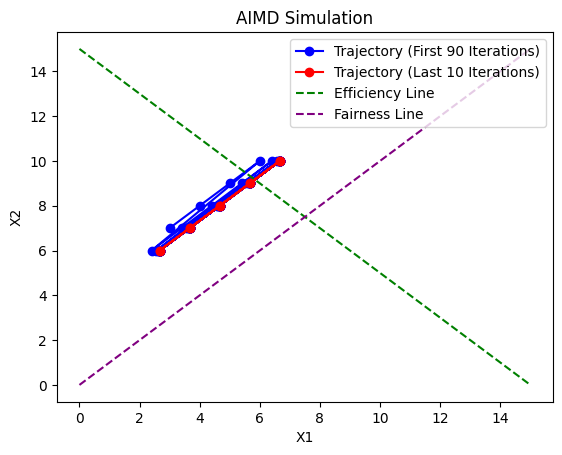

Best hyperparameters: alpha1: 1, alpha2: 1, beta1: 0.4, beta2: 0.6
Throughput: 949.0926
Packets transmitted: 942.5556


In [9]:
import numpy as np
import matplotlib.pyplot as plt

class AIMD:
    def __init__(self, C, alpha1, alpha2, beta1, beta2, iterates_max = 100):
        self.C = C # Max capacity = 15
        self.iterates_max = iterates_max # Maximum iterations = 100
        self.alpha1 = alpha1
        self.alpha2 = alpha2
        self.beta1 = beta1
        self.beta2 = beta2
        self.x1 = np.random.randint(1, 4) # Initialise window size for user 1 (x1) with random value
        self.x2 = np.random.randint(5, 8) # Initialise window size for user 2 (x2) with random value
        self.x1_values = np.zeros(iterates_max) # Storing x1 values to plot graph
        self.x2_values = np.zeros(iterates_max) # Storing x2 values to plot graph
        self.RTT_mean = 80 # Mean RTT = 50

    def run(self):
        packets_transmitted = 0
        total_data_transmitted = 0
        total_time = 0

        for i in range(self.iterates_max):
            # if (i+1) % 20 == 0:
            #     print(f"Iteration {i}: x1 = {round(self.x1, 4)}, x2 = {round(self.x2, 4)}")

            total_time += self.RTT_mean

            # If combined x1 and x2 is less than max capacity, do AI
            if self.x1 + self.x2 <= self.C:
                total_data_transmitted += (self.x1 + self.x2) * 1000
                packets_transmitted += (self.x1 + self.x2)
                self.x1 += self.alpha1
                self.x2 += self.alpha2

            # Else do MD
            else:
                self.x1 *= self.beta1
                self.x2 *= self.beta2

            self.x1_values[i] = self.x1 # Update array with x1 value from this iteration
            self.x2_values[i] = self.x2 # Update array with x2 value from this iteration
            self.RTT_mean = np.random.normal(loc = 80, scale = 5) # Simlulate variation

        throughput = (total_data_transmitted * 8) / total_time
        # print(f"Total packets transmitted: {packets_transmitted}")
        # print(f"Throughput: {throughput} bps")
        return throughput, packets_transmitted

    def fairness_line(self):
        x_values = np.linspace(0, 15, 10)
        y_values = []
        for x in x_values:
          y = x
          y_values.append(y)
        return x_values, y_values

    def capacity_line(self):
        x_values = np.linspace(0, 15, 10)
        y_values = []
        for x in x_values:
          y = -x + 15
          y_values.append(y)
        return x_values, y_values

    def plot(self):
        plt.title("AIMD Simulation")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.plot(self.x1_values[0:90], self.x2_values[0:90], label='Trajectory (First 90 Iterations)', marker='o', color='blue')
        plt.plot(self.x1_values[-10:], self.x2_values[-10:], label='Trajectory (Last 10 Iterations)', marker='o', color='red')
        # plt.plot([min(self.x1_values), max(self.x1_values)], [min(self.x2_values), max(self.x2_values)], linestyle='--', color='black', label='Convergence Line')
        x_values_fl, y_values_fl = self.fairness_line()
        x_values_cl, y_values_cl = self.capacity_line()
        plt.plot(x_values_cl, y_values_cl, linestyle='--', color='green', label='Efficiency Line')
        plt.plot(x_values_fl, y_values_fl, linestyle='--', color='purple', label='Fairness Line')
        plt.legend()
        plt.show()


# Grid of hyperparameters to search
param_grid = {
    'alpha1': [1, 2, 3],
    'alpha2': [1, 2, 3],
    'beta1': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'beta2': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}

best_throughput = float('-inf')
best_params = None

# Grid search
for alpha1 in param_grid['alpha1']:
    for alpha2 in param_grid['alpha2']:
        for beta1 in param_grid['beta1']:
            for beta2 in param_grid['beta2']:
                aimd = AIMD(15, alpha1, alpha2, beta1, beta2)
                throughput, packets_transmitted = aimd.run()
                if throughput > best_throughput:
                    best_throughput = throughput
                    best_packets = packets_transmitted
                    best_params = {'alpha1': alpha1, 'alpha2': alpha2, 'beta1': beta1, 'beta2': beta2}

best_aimd = AIMD(15, best_params['alpha1'], best_params['alpha2'], best_params['beta1'], best_params['beta2'])
best_aimd.run()
best_aimd.plot()

print(f"Best hyperparameters: alpha1: {best_params['alpha1']}, alpha2: {best_params['alpha2']}, beta1: {best_params['beta1']}, beta2: {best_params['beta2']}")
print("Throughput:", round(best_throughput, 4))
print("Packets transmitted:", round(best_packets, 4))

## Case 4: Q-Learning to Find Optimal Parameters

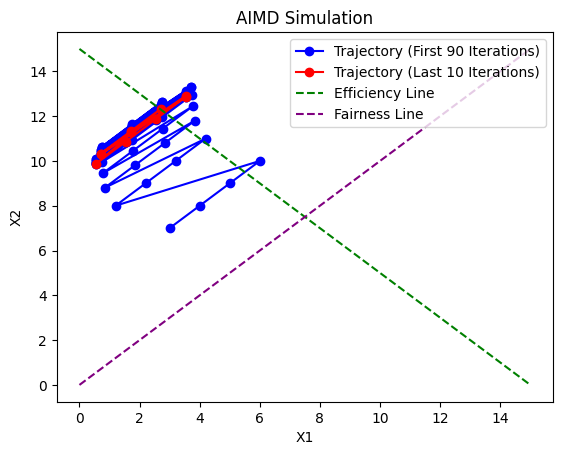

Best hyperparameters: alpha1: 1, alpha2: 1, beta1: 0.2, beta2: 0.8
Throughput: 1451.8177
Packets transmitted: 1457.8


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class AIMD_Qlearning:
    def __init__(self, C, alpha1, alpha2, beta1, beta2, iterates_max=100):
        self.C = C # Max capacity = 15
        self.iterates_max = iterates_max # Maximum iterations = 100
        self.alpha1 = alpha1
        self.alpha2 = alpha2
        self.beta1 = beta1
        self.beta2 = beta2
        self.actions = [(0, 0), (alpha1, 0), (0, alpha2), (alpha1, alpha2), (-beta1, 0), (0, -beta2)] # Actions: [0, AI1, AI2, AI1&AI2, MD1, MD2]
        self.x1 = np.random.randint(1, 4) # Initialise window size for user 1 (x1) with random value
        self.x2 = np.random.randint(5, 8) # Initialise window size for user 2 (x2) with random value
        self.Q_table = np.zeros((self.C+1, self.C+1, len(self.actions))) # Q-table initialization
        self.epsilon = 0.1 # Exploration rate
        self.alpha = 0.1 # Learning rate
        self.gamma = 0.9 # Discount rate
        self.RTT_mean = 80 # Mean RTT = 50

    def state_to_index(self, x1, x2):
        return int(x1), int(x2)

    def choose_action(self, x1, x2):
        if np.random.rand() < self.epsilon:
            return np.random.choice(len(self.actions))
        else:
            x1_index, x2_index = self.state_to_index(x1, x2)
            return np.argmax(self.Q_table[x1_index, x2_index])

    def update_Q_table(self, state, action, next_state, reward):
        x1_index, x2_index = self.state_to_index(state[0], state[1])
        next_x1_index, next_x2_index = self.state_to_index(next_state[0], next_state[1])
        next_x1_index = int(next_x1_index)
        next_x2_index = int(next_x2_index)
        action_index = self.actions.index(action)  # Get the index of the action in the action list

        self.Q_table[x1_index, x2_index, action_index] += self.alpha * (reward + self.gamma * np.max(self.Q_table[next_x1_index, next_x2_index]) - self.Q_table[x1_index, x2_index, action_index])

    def run(self):
        packets_transmitted = 0
        total_data_transmitted = 0
        total_time = 0
        self.x1_values = []  # Record x1 values for plotting
        self.x2_values = []  # Record x2 values for plotting

        for i in range(self.iterates_max):
            total_time += self.RTT_mean

            x1_index, x2_index = self.state_to_index(self.x1, self.x2)
            action_index = self.choose_action(self.x1, self.x2)
            action = self.actions[action_index]

            next_x1 = max(0, min(self.C, self.x1 + action[0]))
            next_x2 = max(0, min(self.C, self.x2 + action[1]))

            # If combined x1 and x2 is less than max capacity, do AI
            if next_x1 + next_x2 <= self.C:
                total_data_transmitted += (next_x1 + next_x2) * 1000
                packets_transmitted += (next_x1 + next_x2)
                reward = (next_x1 + next_x2) * 1000
            else:
                reward = 0

            next_state = (next_x1, next_x2)
            self.update_Q_table((self.x1, self.x2), action, next_state, reward)
            self.x1, self.x2 = next_x1, next_x2
            self.RTT_mean = np.random.normal(loc=80, scale=5)  # Simulate variation

            # Record x1 and x2 values
            self.x1_values.append(self.x1)
            self.x2_values.append(self.x2)

        throughput = (total_data_transmitted * 8) / total_time
        return throughput, packets_transmitted

    def fairness_line(self):
        x_values = np.linspace(0, 15, 10)
        y_values = []
        for x in x_values:
          y = x
          y_values.append(y)
        return x_values, y_values

    def capacity_line(self):
        x_values = np.linspace(0, 15, 10)
        y_values = []
        for x in x_values:
          y = -x + 15
          y_values.append(y)
        return x_values, y_values

    def plot(self):
        plt.title("AIMD Simulation")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.plot(self.x1_values[0:90], self.x2_values[0:90], label='Trajectory (First 90 Iterations)', marker='o', color='blue')
        plt.plot(self.x1_values[-10:], self.x2_values[-10:], label='Trajectory (Last 10 Iterations)', marker='o', color='red')
        # plt.plot([min(self.x1_values), max(self.x1_values)], [min(self.x2_values), max(self.x2_values)], linestyle='--', color='black', label='Convergence Line')
        x_values_fl, y_values_fl = self.fairness_line()
        x_values_cl, y_values_cl = self.capacity_line()
        plt.plot(x_values_cl, y_values_cl, linestyle='--', color='green', label='Efficiency Line')
        plt.plot(x_values_fl, y_values_fl, linestyle='--', color='purple', label='Fairness Line')
        plt.legend()
        plt.show()

# Grid of hyperparameters to search
param_grid = {
    'C': [15],
    'alpha1': [1, 2, 3],
    'alpha2': [1, 2, 3],
    'beta1': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'beta2': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}

best_throughput = float('-inf')
best_packets_transmitted = 0
best_params = None

# Grid search
for C in param_grid['C']:
    for alpha1 in param_grid['alpha1']:
        for alpha2 in param_grid['alpha2']:
            for beta1 in param_grid['beta1']:
                for beta2 in param_grid['beta2']:
                    aimd = AIMD_Qlearning(C, alpha1, alpha2, beta1, beta2)
                    throughput, packets_transmitted = aimd.run()
                    if throughput > best_throughput:
                        best_throughput = throughput
                        best_packets_transmitted = packets_transmitted
                        best_params = {'C': C, 'alpha1': alpha1, 'alpha2': alpha2, 'beta1': beta1, 'beta2': beta2}

best_aimd = AIMD(best_params['C'], best_params['alpha1'], best_params['alpha2'], best_params['beta1'], best_params['beta2'])
best_aimd.run()
best_aimd.plot()

print(f"Best hyperparameters: alpha1: {best_params['alpha1']}, alpha2: {best_params['alpha2']}, beta1: {best_params['beta1']}, beta2: {best_params['beta2']}")
print("Throughput:", round(best_throughput, 4))
print("Packets transmitted:", round(best_packets_transmitted, 4))

## Test Case 5: Variable Number of Users

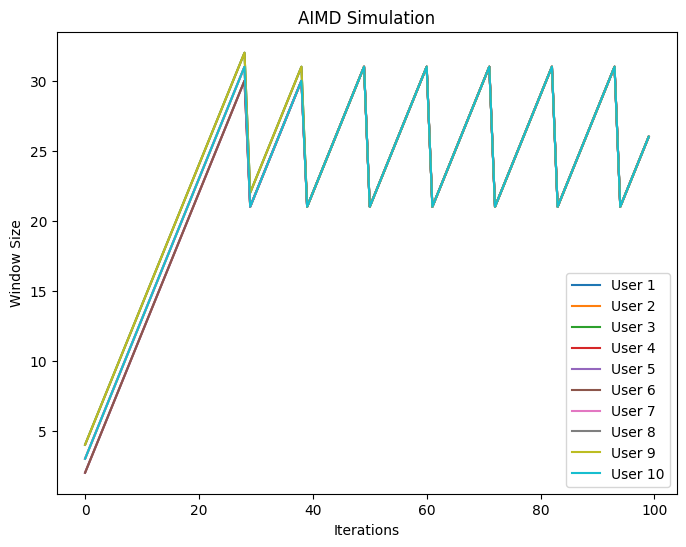

Best hyperparameters for 10 users: alpha: 1, beta: 0.7
Throughput: 69.8142


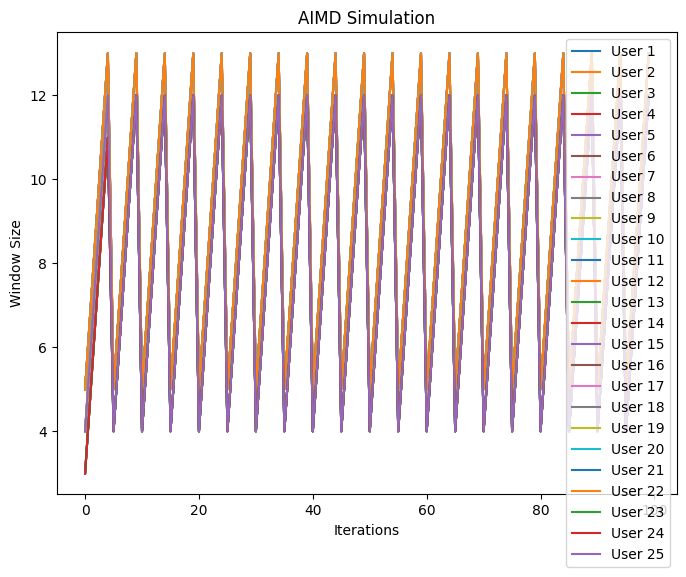

Best hyperparameters for 25 users: alpha: 2, beta: 0.4
Throughput: 18.0845


In [11]:
import numpy as np
import matplotlib.pyplot as plt

class AIMD:
    def __init__(self, C, alpha, beta, num_users=2, iterates_max=100):
        self.C = C # Max capacity
        self.iterates_max = iterates_max # Maximum iterations
        self.alpha = alpha
        self.beta = beta
        self.num_users = num_users
        self.x_values = np.random.randint(1, 4, size=num_users) # Initialize window sizes for each user with random values
        self.x_trajectories = [np.zeros(iterates_max) for _ in range(num_users)] # Storing x values for each user to plot graph
        self.RTT_mean = 80 # Mean RTT

    def run(self):
        total_data_transmitted = 0
        total_time = 0

        for i in range(self.iterates_max):
            total_time += self.RTT_mean * self.num_users

            # Calculate total window size for all users
            total_window_size = sum(self.x_values)

            # If total window size is less than max capacity, do additive increase for each user
            if total_window_size <= self.C:
                for user in range(self.num_users):
                    total_data_transmitted += self.x_values[user] * 1000
                    self.x_values[user] += self.alpha

            # Else, do multiplicative decrease for each user
            else:
                for user in range(self.num_users):
                    self.x_values[user] *= self.beta

            # Store window sizes for each user
            for user in range(self.num_users):
                self.x_trajectories[user][i] = self.x_values[user]

            # Simulate variation in RTT
            self.RTT_mean = np.random.normal(loc=80, scale=5)

        throughput = (total_data_transmitted * 8) / total_time
        return throughput

    def plot(self):
        plt.figure(figsize=(8, 6))
        plt.title("AIMD Simulation")
        plt.xlabel("Iterations")
        plt.ylabel("Window Size")
        for user in range(self.num_users):
            plt.plot(self.x_trajectories[user], label=f'User {user+1}')
        plt.legend()
        plt.show()

# Grid of hyperparameters to search
param_grid = {
    'C': [300],
    'alpha': [1, 2, 3],
    'beta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}

# Varying number of users
num_users_list = [10, 25]

for num_users in num_users_list:
    best_throughput = float('-inf')
    best_params = None

    # Grid search
    for alpha in param_grid['alpha']:
        for beta in param_grid['beta']:
            aimd = AIMD(C=15, alpha=alpha, beta=beta, num_users=num_users)
            throughput = aimd.run()
            if throughput > best_throughput:
                best_throughput = throughput
                best_params = {'alpha': alpha, 'beta': beta}

    best_aimd = AIMD(C = 300, alpha=best_params['alpha'], beta=best_params['beta'], num_users=num_users)
    best_aimd.run()
    best_aimd.plot()

    print(f"Best hyperparameters for {num_users} users: alpha: {best_params['alpha']}, beta: {best_params['beta']}")
    print("Throughput:", round(best_throughput, 4))
